### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-23/04/20
#### Clasificacion de imagenes motoras en EEG con CNN-2D
##### Caracteristicas = RWE-DWT
##### 5 ejecuciones independientes

##### Sujeto 1
##### Accuracy = 57.64%
##### Kappa = 0.4352

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 22, 3, 1))
x_test = x_test.reshape((n_samples_test, 22, 3, 1))

print(x_train.shape)
print(x_test.shape)

(288, 22, 3, 1)
(288, 22, 3, 1)


In [0]:
mc = ModelCheckpoint('/content/drive/My Drive/BCI-IV-2a/Modelos/Modelo_RWE09.hdf5',
                     monitor='val_accuracy', save_best_only=True, verbose=1)

In [0]:
def CNN_2D():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', padding='same',
                   input_shape=x_train.shape[1:]))
  model.add(Flatten())
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  return model

Iteration: 1

Epoch 00001: val_accuracy improved from -inf to 0.28125, saving model to /content/drive/My Drive/BCI-IV-2a/Modelos/Modelo_RWE09.hdf5

Epoch 00002: val_accuracy improved from 0.28125 to 0.29514, saving model to /content/drive/My Drive/BCI-IV-2a/Modelos/Modelo_RWE09.hdf5

Epoch 00003: val_accuracy improved from 0.29514 to 0.36111, saving model to /content/drive/My Drive/BCI-IV-2a/Modelos/Modelo_RWE09.hdf5

Epoch 00004: val_accuracy did not improve from 0.36111

Epoch 00005: val_accuracy improved from 0.36111 to 0.38194, saving model to /content/drive/My Drive/BCI-IV-2a/Modelos/Modelo_RWE09.hdf5

Epoch 00006: val_accuracy improved from 0.38194 to 0.39583, saving model to /content/drive/My Drive/BCI-IV-2a/Modelos/Modelo_RWE09.hdf5

Epoch 00007: val_accuracy improved from 0.39583 to 0.40972, saving model to /content/drive/My Drive/BCI-IV-2a/Modelos/Modelo_RWE09.hdf5

Epoch 00008: val_accuracy improved from 0.40972 to 0.43056, saving model to /content/drive/My Drive/BCI-IV-2a/M

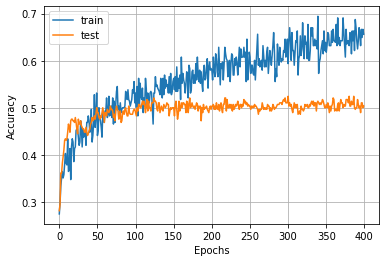

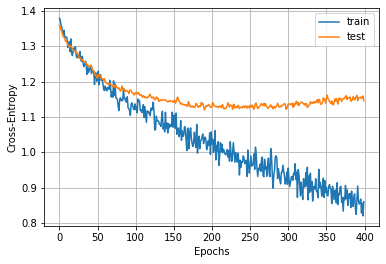

Iteration: 2

Epoch 00001: val_accuracy did not improve from 0.52431

Epoch 00002: val_accuracy did not improve from 0.52431

Epoch 00003: val_accuracy did not improve from 0.52431

Epoch 00004: val_accuracy did not improve from 0.52431

Epoch 00005: val_accuracy did not improve from 0.52431

Epoch 00006: val_accuracy did not improve from 0.52431

Epoch 00007: val_accuracy did not improve from 0.52431

Epoch 00008: val_accuracy did not improve from 0.52431

Epoch 00009: val_accuracy did not improve from 0.52431

Epoch 00010: val_accuracy did not improve from 0.52431

Epoch 00011: val_accuracy did not improve from 0.52431

Epoch 00012: val_accuracy did not improve from 0.52431

Epoch 00013: val_accuracy did not improve from 0.52431

Epoch 00014: val_accuracy did not improve from 0.52431

Epoch 00015: val_accuracy did not improve from 0.52431

Epoch 00016: val_accuracy did not improve from 0.52431

Epoch 00017: val_accuracy did not improve from 0.52431

Epoch 00018: val_accuracy did not 

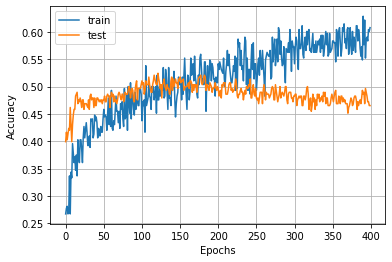

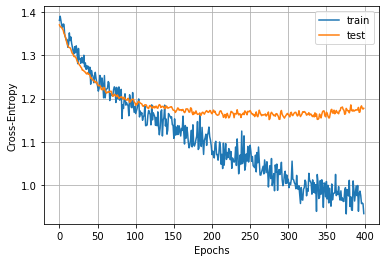

Iteration: 3

Epoch 00001: val_accuracy did not improve from 0.52431

Epoch 00002: val_accuracy did not improve from 0.52431

Epoch 00003: val_accuracy did not improve from 0.52431

Epoch 00004: val_accuracy did not improve from 0.52431

Epoch 00005: val_accuracy did not improve from 0.52431

Epoch 00006: val_accuracy did not improve from 0.52431

Epoch 00007: val_accuracy did not improve from 0.52431

Epoch 00008: val_accuracy did not improve from 0.52431

Epoch 00009: val_accuracy did not improve from 0.52431

Epoch 00010: val_accuracy did not improve from 0.52431

Epoch 00011: val_accuracy did not improve from 0.52431

Epoch 00012: val_accuracy did not improve from 0.52431

Epoch 00013: val_accuracy did not improve from 0.52431

Epoch 00014: val_accuracy did not improve from 0.52431

Epoch 00015: val_accuracy did not improve from 0.52431

Epoch 00016: val_accuracy did not improve from 0.52431

Epoch 00017: val_accuracy did not improve from 0.52431

Epoch 00018: val_accuracy did not 

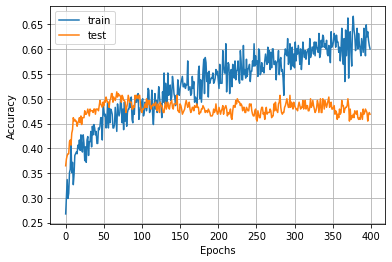

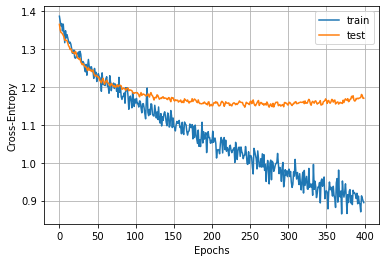

Iteration: 4

Epoch 00001: val_accuracy did not improve from 0.52431

Epoch 00002: val_accuracy did not improve from 0.52431

Epoch 00003: val_accuracy did not improve from 0.52431

Epoch 00004: val_accuracy did not improve from 0.52431

Epoch 00005: val_accuracy did not improve from 0.52431

Epoch 00006: val_accuracy did not improve from 0.52431

Epoch 00007: val_accuracy did not improve from 0.52431

Epoch 00008: val_accuracy did not improve from 0.52431

Epoch 00009: val_accuracy did not improve from 0.52431

Epoch 00010: val_accuracy did not improve from 0.52431

Epoch 00011: val_accuracy did not improve from 0.52431

Epoch 00012: val_accuracy did not improve from 0.52431

Epoch 00013: val_accuracy did not improve from 0.52431

Epoch 00014: val_accuracy did not improve from 0.52431

Epoch 00015: val_accuracy did not improve from 0.52431

Epoch 00016: val_accuracy did not improve from 0.52431

Epoch 00017: val_accuracy did not improve from 0.52431

Epoch 00018: val_accuracy did not 

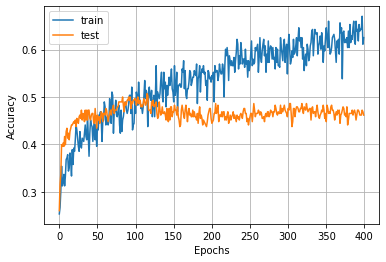

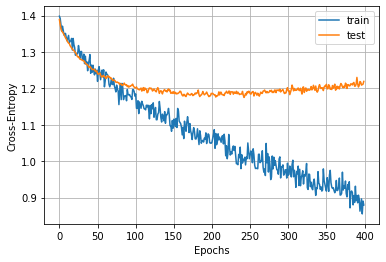

Iteration: 5

Epoch 00001: val_accuracy did not improve from 0.52431

Epoch 00002: val_accuracy did not improve from 0.52431

Epoch 00003: val_accuracy did not improve from 0.52431

Epoch 00004: val_accuracy did not improve from 0.52431

Epoch 00005: val_accuracy did not improve from 0.52431

Epoch 00006: val_accuracy did not improve from 0.52431

Epoch 00007: val_accuracy did not improve from 0.52431

Epoch 00008: val_accuracy did not improve from 0.52431

Epoch 00009: val_accuracy did not improve from 0.52431

Epoch 00010: val_accuracy did not improve from 0.52431

Epoch 00011: val_accuracy did not improve from 0.52431

Epoch 00012: val_accuracy did not improve from 0.52431

Epoch 00013: val_accuracy did not improve from 0.52431

Epoch 00014: val_accuracy did not improve from 0.52431

Epoch 00015: val_accuracy did not improve from 0.52431

Epoch 00016: val_accuracy did not improve from 0.52431

Epoch 00017: val_accuracy did not improve from 0.52431

Epoch 00018: val_accuracy did not 

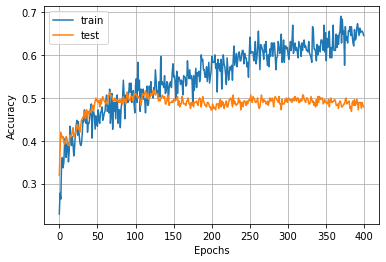

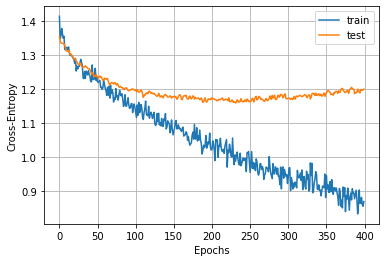


Resultados:
loss: [1.1460882955127292, 1.1775368187162611, 1.17017752594418, 1.2192427979575262, 1.200208968586392]
accuracy: [0.5034722089767456, 0.4652777910232544, 0.46875, 0.4618055522441864, 0.4791666567325592]
kappa: [0.3379629629629629, 0.2870370370370371, 0.29166666666666663, 0.28240740740740744, 0.3055555555555556]


In [11]:
array_loss = []
array_acc = []
array_kappa = []
for i in range(5):
  print("Iteration:", i+1)
    
  model = CNN_2D()

  history = model.fit(x_train, y_train, epochs=400, batch_size=18,
                      validation_data=(x_test, y_test), verbose=0,
                      callbacks=[mc])
    
  test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
  array_loss.append(test_loss)
  print("loss: ", test_loss)
  array_acc.append(test_acc)
  print("accuracy: ", test_acc)
    
  probabilidades = model.predict(x_test)
  y_pred = np.argmax(probabilidades, 1) #1=fila
    
  kappa = cohen_kappa_score(y_test, y_pred)
  array_kappa.append(kappa)
  print("kappa: ", kappa)
    
  matriz_confusion = confusion_matrix(y_test, y_pred)
  print("confusion matrix:\n", matriz_confusion)
    
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'test'])
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Cross-Entropy')
  plt.legend(['train', 'test'])
  plt.show()
    
print() 
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)

In [12]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 22, 3, 32)         320       
_________________________________________________________________
flatten_5 (Flatten)          (None, 2112)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                33808     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 68        
Total params: 34,196
Trainable params: 34,196
Non-trainable params: 0
_________________________________________________________________


In [13]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("std: (+/- %.4f)" % np.std(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("std: (+/- %.4f)" % np.std(array_kappa))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))

Mean Accuracy: 0.4757
std: (+/- 0.0151)
Mean Kappa: 0.3009
std: (+/- 0.0201)
Max Accuracy: 0.5035
Max Kappa: 0.3380
